     year  renewables_share_energy
122  2022                    9.900
123  2023                   10.447


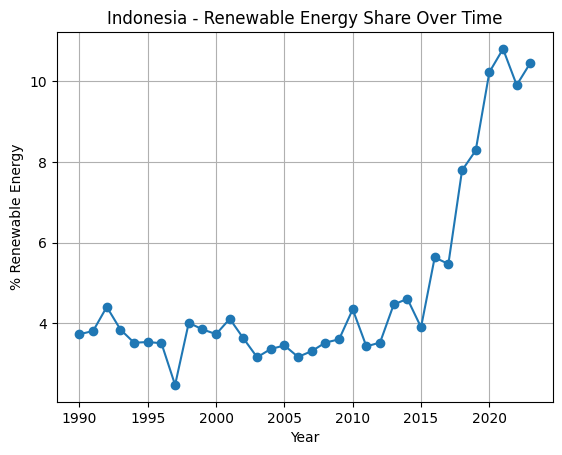

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model trained.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


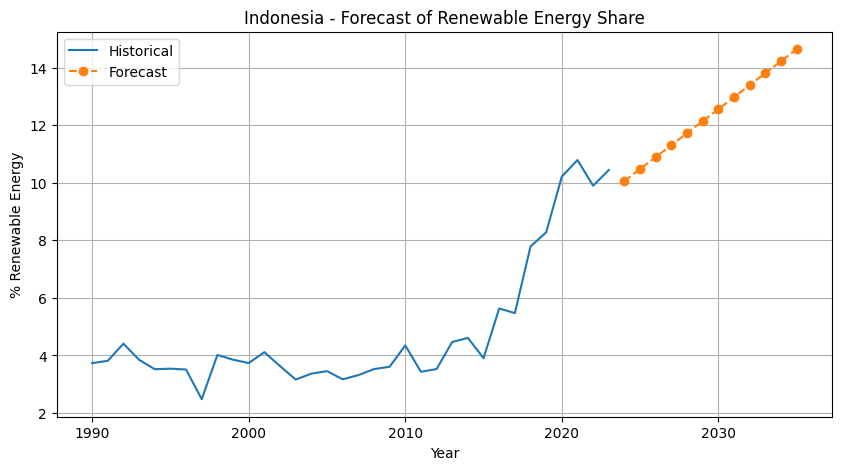

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/owid-energy-data.csv', sep=';',  on_bad_lines='skip')
df.head()

country = 'Indonesia'
features = ['year', 'renewables_share_energy']

df_country = df[df['country'] == country][features].dropna()
df_country = df_country[df_country['year'] >= 1990] #only use recent data
print(df_country.tail(2))

plt.figure()
plt.plot(df_country['year'], df_country['renewables_share_energy'], marker='o')
plt.title(f"{country} - Renewable Energy Share Over Time")
plt.xlabel("Year")
plt.ylabel("% Renewable Energy")
plt.grid(True)
plt.show()

X = df_country[['year']].values
y = df_country['renewables_share_energy'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_scaled, y, epochs=100, verbose=0)

print("Model trained.")

#Forecast 2024-2025
future_years = np.arange(2024,2036).reshape(-1,1) ##to transfrom the array from 1D to 2D
future_scaled = scaler.transform(future_years)
future_preds = model.predict(future_scaled)

plt.figure(figsize=(10,5))
plt.plot(df_country['year'], df_country['renewables_share_energy'], label='Historical')
plt.plot(future_years, future_preds, label='Forecast', linestyle='--', marker='o')
plt.title(f"{country} - Forecast of Renewable Energy Share")
plt.xlabel("Year")
plt.ylabel("% Renewable Energy")
plt.legend()
plt.grid(True)
plt.show()


